Antes de comenzar el análisis de este data set, tenemos que mencionar que su longitud va a ser **significativamente más corta** que el resto de cuadernos. El motivo de esto es que este conjunto de datos ha sido utilizado sobre todo para realizar nexos entre distintos data set y obtener conclusiones más profundas. Por ejemplo, en el caso de la creación de mapas, hemos tenido que utilizar las opiniones como nexo entre usuarios y negocios. Por ello, creemos que aunque en este cuaderno la longitud sea bastante menor, creemos que hemos utilizado estos datos lo suficiente a lo largo del análisis.

In [1]:
import pandas as pd

df_opiniones = pd.read_csv('Dataset/datos_opiniones_sintexto.csv')

## Análisis descriptivo

In [2]:
df_opiniones

,opinion_id,usuario_id,negocio_id,puntuacion,util,divertido,guay,anyo,mes,dia,hora,sentimiento,objetividad
0,Q1sbwvVQXV2734tPgoKj4Q,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1.0,6.0,1.0,0.0,2013,5,7,4,0.333333,0.383333
1,GJXCdrto3ASJOqKeVWPi6Q,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,5.0,0.0,0.0,0.0,2017,1,14,21,0.657905,0.463332
2,2TzJjDVDEuAW6MR5Vuc1ug,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5.0,3.0,0.0,0.0,2016,11,9,20,0.714562,0.416000
3,yi0R0Ugj_xUx_Nek0-_Qig,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,5.0,0.0,0.0,0.0,2018,1,9,20,0.916250,0.115000
4,11a8sVPMUFtaC7_ABRkmtw,ssoyf2_x0EQMed6fgHeMyQ,b1b1eb3uo-w561D0ZfCEiQ,1.0,7.0,0.0,0.0,2018,1,30,23,0.524638,0.567593
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6685892,0pCaq1hqAViS2N6ldlp_sQ,Xu_YazIajfsc7SRj1wJ6Mg,RXBFk3tVBxiTf3uOt9KExQ,5.0,1.0,0.0,0.0,2018,7,3,12,0.505078,0.487500
6685893,jPCXuSBbI_cPocgoNBhdkg,V6BjjQICDO4q7TT3ZhaPWw,yA6dKNm_zl1ucZCnwW8ZCg,1.0,13.0,11.0,5.0,2013,5,22,15,0.500000,1.000000
6685894,zwzO3yPdGbdgGy3-XQ0SWg,PFiIECX8wuvi7P-1mCvIjA,a192hdM0_UVCYLwPJv1Qwg,5.0,0.0,0.0,0.0,2018,11,13,21,0.608750,0.614615
6685895,o8Nc2BJhKJXM6tRHJDRuPA,wu5R5_N7q5iqCBh6NBX26Q,kOo4ZY2UQAX4j312mzQ8mA,5.0,1.0,1.0,1.0,2018,8,13,18,0.590579,0.445463


Los atributos que tenemos en este data set son bastante parecidos al resto de conjuntos de datos. Aunque suponemos que ya están más que asimilados, vamos a volver a explicarlos por encima ya que tienen algunos detalles distintos:

- **id**: Las id son bastante autoexplicativas; son las cadenas de texto que identifican la opinion, el usuario y el negocio.


- **puntuacion**: Puntuación que el autor de la opinión ha decidido darle al negocio después de su visita.


- **util, divertido y guay**: Son likes o puntuaciones que pueden seleccionar las personas que ven esa review pero no la han creado. Es decir, si una persona ve una review que no ha creado él, puede darle a "divertido" si piensa que es una review divertida o por el motivo que sea.


- **Anyo, mes, dia y hora**: Columnas creadas por nosotros en el preprocesado que indican la fecha en la que se hizo la review.


- **sentimiento**: Número decimal que está en el rango 0.0 - 1.0 y que indica si una opinión tiene connotación negativa, positiva o neutra. 1 significa positiva, 0.5 neutra y 0.0 negativa. Este atributo fue obtenido en el <span style="color:red">preprocesado</span>; decidimos eliminar los textos para reducir espacio y añadir los sentimientos en forma de "resumen".


- **objetividad**: Número entre 0.0 y 1.0 que indica cuán objetivo ha sido el autor de la review al hacer la opinión. Al igual que el atributo sentimiento, este fue creado a partir de los textos en el **preprocesado** para resumirlos. 

In [3]:
df_opiniones.describe()

,puntuacion,util,divertido,guay,anyo,mes,dia,hora,sentimiento,objetividad
count,6.685897e+06,6.685897e+06,6.685897e+06,6.685897e+06,6.685897e+06,6.685897e+06,6.685897e+06,6.685897e+06,6.685897e+06,6.685897e+06
mean,3.716199e+00,1.354135e+00,4.827669e-01,5.787711e-01,2.015134e+03,6.450918e+00,1.573550e+01,1.236879e+01,6.189006e-01,4.408908e-01
std,1.463643e+00,3.700193e+00,2.378646e+00,2.359024e+00,2.454348e+00,3.319091e+00,8.806804e+00,8.085963e+00,1.165096e-01,1.349276e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.004000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.014000e+03,4.000000e+00,8.000000e+00,4.000000e+00,5.503030e-01,3.622222e-01
50%,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.016000e+03,7.000000e+00,1.600000e+01,1.500000e+01,6.203311e-01,4.425434e-01
75%,5.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,2.017000e+03,9.000000e+00,2.300000e+01,2.000000e+01,6.893939e-01,5.187500e-01
max,5.000000e+00,1.241000e+03,1.290000e+03,5.060000e+02,2.018000e+03,1.200000e+01,3.100000e+01,2.300000e+01,1.000000e+00,1.000000e+00


**Datos interesantes**

- puntuacion:
    - Como mínimo, el **25% de las opiniones le ponen a los negocios un 3 de puntuación**, una cifra realmente alta. Este valor cuadra con el razonamiento que hicimos en el análisis de usuarios en la que se podía ver como el cluster de **usuarios más comunes hacen puntuaciones realmente altas**. Suponemos que esto es lo más común ya que la mayor parte de las personas no son realmente tan críticas.
    
    - La media también se mantiene bastante alta, llegando casi al 4 de media.
    

- util, divertido y guay:
    - En general, los "likes" util, divertido y guay no son muy utilizados. 
    
    - Podemos observar que, como mínimo, el **75% de las opiniones NO tienen un solo like de divertido**. En cuanto a guay y divertido, el **50% de las opiniones no tienen ninguno de estos likes**.

    - Aunque realmente no se utilizan demasiado los likes (como hemos indicado en el punto anterior) los valores máximos son realmente elevados, llegando incluso a superar los 1000 likes en algunas categorías. Esto se puede deber a la existencia de algunas reviews virales.
    

- sentimiento y objetividad:
    - En el caso de sentimiento, se puede observar que al menos el 25% de las reviews se consideran positivas (según el análisis de sentimientos que hicimos en el preprocesamiento). Esto básicamente nos dice que los usuarios suelen ser bastante optimistas con sus reviews.
    
    - En cuanto a objetividad se refiere, al menos hay un 50% de opiniones que son subjetivas (según el análisis de sentimientos que hicimos en el preprocesamiento). Esta gran cantidad de opiniones subjetivas es normal; son opiniones, no análisis críticos.

In [4]:
df_opiniones['fecha_completa'] = pd.to_datetime((df_opiniones.anyo*10000+df_opiniones.mes*100+df_opiniones.dia).apply(str),format='%Y%m%d')

## Cantidad de Reviews a lo largo del tiempo

In [5]:
df_opiniones

,opinion_id,usuario_id,negocio_id,puntuacion,util,divertido,guay,anyo,mes,dia,hora,sentimiento,objetividad,fecha_completa
0,Q1sbwvVQXV2734tPgoKj4Q,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1.0,6.0,1.0,0.0,2013,5,7,4,0.333333,0.383333,2013-05-07
1,GJXCdrto3ASJOqKeVWPi6Q,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,5.0,0.0,0.0,0.0,2017,1,14,21,0.657905,0.463332,2017-01-14
2,2TzJjDVDEuAW6MR5Vuc1ug,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5.0,3.0,0.0,0.0,2016,11,9,20,0.714562,0.416000,2016-11-09
3,yi0R0Ugj_xUx_Nek0-_Qig,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,5.0,0.0,0.0,0.0,2018,1,9,20,0.916250,0.115000,2018-01-09
4,11a8sVPMUFtaC7_ABRkmtw,ssoyf2_x0EQMed6fgHeMyQ,b1b1eb3uo-w561D0ZfCEiQ,1.0,7.0,0.0,0.0,2018,1,30,23,0.524638,0.567593,2018-01-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6685892,0pCaq1hqAViS2N6ldlp_sQ,Xu_YazIajfsc7SRj1wJ6Mg,RXBFk3tVBxiTf3uOt9KExQ,5.0,1.0,0.0,0.0,2018,7,3,12,0.505078,0.487500,2018-07-03
6685893,jPCXuSBbI_cPocgoNBhdkg,V6BjjQICDO4q7TT3ZhaPWw,yA6dKNm_zl1ucZCnwW8ZCg,1.0,13.0,11.0,5.0,2013,5,22,15,0.500000,1.000000,2013-05-22
6685894,zwzO3yPdGbdgGy3-XQ0SWg,PFiIECX8wuvi7P-1mCvIjA,a192hdM0_UVCYLwPJv1Qwg,5.0,0.0,0.0,0.0,2018,11,13,21,0.608750,0.614615,2018-11-13
6685895,o8Nc2BJhKJXM6tRHJDRuPA,wu5R5_N7q5iqCBh6NBX26Q,kOo4ZY2UQAX4j312mzQ8mA,5.0,1.0,1.0,1.0,2018,8,13,18,0.590579,0.445463,2018-08-13


In [6]:
df_opiniones.sort_values(['anyo', 'mes', 'dia'], ascending=False).head(10)

,opinion_id,usuario_id,negocio_id,puntuacion,util,divertido,guay,anyo,mes,dia,hora,sentimiento,objetividad,fecha_completa
561395,pusJ6EKVQVxox7tA0L9SSA,1kXHsplFug2x_u-6Jw5rig,ujmEBvifdJM6h6RLv4wQIg,1.0,0.0,0.0,0.0,2018,11,14,6,0.397005,0.430455,2018-11-14
561972,vHsuqvNN_4Du9rHsGWArcg,mOslfuSItsKwkJ6Yn1PW9A,bNWW_GHLF4M9Pmao4nxpeg,2.0,0.0,0.0,0.0,2018,11,14,17,0.356944,0.427222,2018-11-14
562423,Iql3Vc8GQbwZJVDrscj3lA,DyD5P8yAibkpMOVnIWVNpg,dUffgo9Lh_Vk9TLuFR5ywg,2.0,0.0,0.0,0.0,2018,11,14,15,0.656250,0.225000,2018-11-14
562540,720ulMojt-LK-99G05dwZQ,bmlf1Sd4-yAM9kW1eR7FKQ,fbQaKW0Lte0JQ_opbnjdKg,5.0,0.0,0.0,0.0,2018,11,14,1,0.706696,0.342857,2018-11-14
563387,XJPZoCZFhZ766NTd9KKWgQ,sDEcTcxTO7A7mZftS-wWJw,2DUdvdQE8FOxCHHp59HHzw,5.0,0.0,0.0,0.0,2018,11,14,17,0.730568,0.391111,2018-11-14
563544,vqAGA_Mu6DW7u18Czzlokg,pTY4AA4RgrAdSzHrBFxUUw,yWw4jRQJYzuBLnt1EUbG7w,5.0,0.0,0.0,0.0,2018,11,14,11,0.500000,1.000000,2018-11-14
563829,XrjEiyEJVt1q8YHS0KdpZg,Dl-szmb66iqrRDmBQ2NdIQ,rdE9gg0WB7Z8kRytIMSapg,5.0,0.0,0.0,0.0,2018,11,14,4,0.656917,0.337148,2018-11-14
564636,RMzbx2psMQFbLHc9v0dD7Q,9NerDgH5cl3C3qKUl0UNeQ,ImxGusZgOqUMv7bHGyLQoQ,1.0,0.0,0.0,0.0,2018,11,14,2,0.551894,0.681061,2018-11-14
564888,CwSsxUFShtDFDpEub5kqTQ,_Z_iVhHhDh5Yzd_UutaeJw,JytR7WvKyytDQNwOHUzSEg,5.0,0.0,0.0,0.0,2018,11,14,14,0.700000,0.430000,2018-11-14
565365,ks-xhZ5XpRG2l7m5Av5dmg,z1ewtvtsQZDkmdTuotL6Qw,KkOY69k98WGZxwfgqTpwAA,5.0,0.0,0.0,0.0,2018,11,14,5,0.722190,0.335619,2018-11-14


In [7]:
df_groupDate = df_opiniones.groupby('fecha_completa').count()
df_groupDate

,opinion_id,usuario_id,negocio_id,puntuacion,util,divertido,guay,anyo,mes,dia,hora,sentimiento,objetividad
fecha_completa,,,,,,,,,,,,,
2004-10-12,1,1,1,1,1,1,1,1,1,1,1,1,1
2004-10-19,7,7,7,7,7,7,7,7,7,7,7,7,7
2004-10-25,1,1,1,1,1,1,1,1,1,1,1,1,1
2004-12-19,2,2,2,2,2,2,2,2,2,2,2,2,2
2004-12-20,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-10,4165,4165,4165,4165,4165,4165,4165,4165,4165,4165,4165,4165,4165
2018-11-11,4391,4391,4391,4391,4391,4391,4391,4391,4391,4391,4391,4391,4391
2018-11-12,4280,4280,4280,4280,4280,4280,4280,4280,4280,4280,4280,4280,4280


In [8]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

plt.figure(figsize = (13, 10))
ax = sns.lineplot(x = df_groupDate.index, y = "opinion_id", data=df_groupDate)

/home/david/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


A simple vista parece que existe una serie temporal en la cantidad de opiniones que se han hecho al día en los últimos diez años. Para ver mejor esta tendencia, vamos a aplicar la **media móvil**. De esta forma, podremos ver mucho mejor el patrón que sigue la serie temporal.

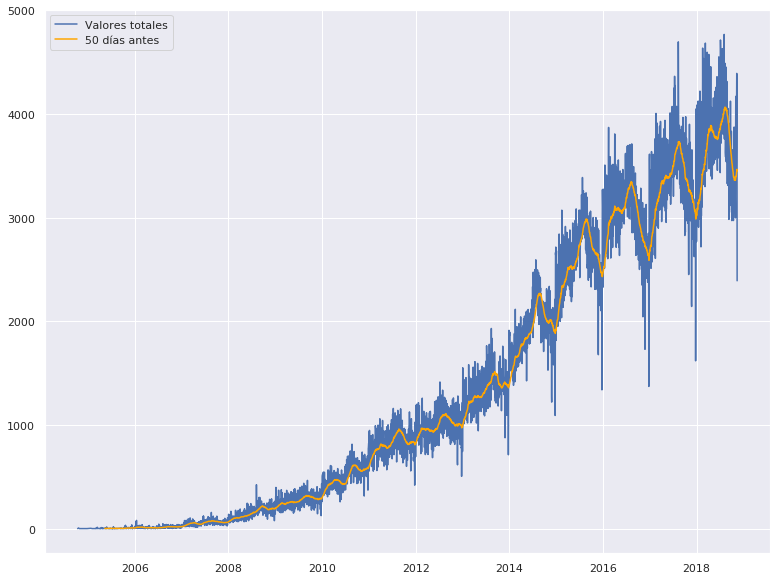

In [9]:
# Generamos la media móvil
rolling_mean = df_groupDate.opinion_id.rolling(window=50).mean()

plt.figure(figsize=(13, 10))
plt.plot(df_groupDate.index, df_groupDate.opinion_id, label='Valores totales')

plt.plot(df_groupDate.index, rolling_mean, label='50 días antes', color='orange')
plt.legend(loc='upper left')

plt.show()

Una vez aplicada la media móvil, podemos ver como a medida que nos acercamos al año 2018/2019 el patrón va siendo cada vez más claro. Esto se puede deber a que al principio la aplicación no era demasiado utilizada y por lo tanto no había suficiente cantidad de personas para generar ese patrón. También podría deberse a que al principio la aplicación no estaba tan instaurada en el mercado y la gente la probaba de vez en cuando.

Para comprobar si efectivamente sigue el patrón, vamos a hacer una **descomposición**.

In [10]:
df_groupDate['opinion_id']

fecha_completa
2004-10-12       1
2004-10-19       7
2004-10-25       1
2004-12-19       2
2004-12-20       1
              ... 
2018-11-10    4165
2018-11-11    4391
2018-11-12    4280
2018-11-13    3977
2018-11-14    2391
Name: opinion_id, Length: 4884, dtype: int64

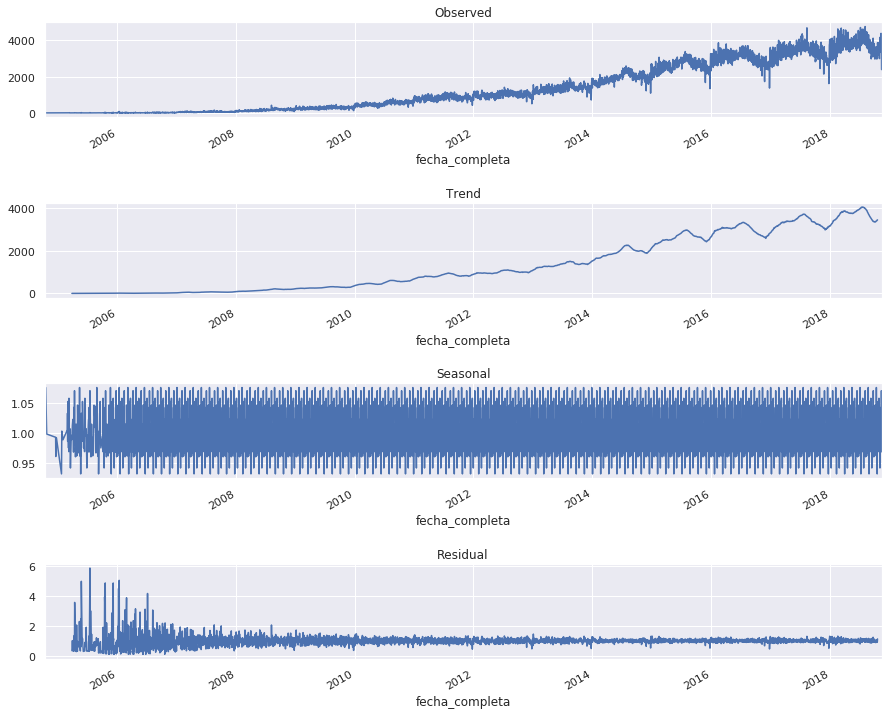

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(15,13))

seasonal = seasonal_decompose(df_groupDate['opinion_id'], freq = 50, model='multiplicative')

seasonal.observed.plot(ax = ax1, legend=False)
seasonal.trend.plot(ax = ax2, legend=False)
seasonal.seasonal.plot(ax = ax3, legend=False)
seasonal.resid.plot(ax = ax4, legend=False)

ax1.title.set_text('Observed')
ax2.title.set_text('Trend')
ax3.title.set_text('Seasonal')
ax4.title.set_text('Residual')

plt.subplots_adjust(hspace= 0.9)

Es realmente bonito ver como al inicio no existe ningún patrón y por lo tanto el ruido existente es bastante más alto y luego progresivamente el ruido va disminuyendo hasta llegar a unos valores que se pueden ignorar fácilmente. A partir de aproximadamente el año 2010, el ruido prácticamente desaparece y el patrón se genera por completo.

Cabe destacar que existen en la gráfica residual una serie de pequeños picos que se repiten al inicio de cada año. Sin embargo, con este zoom no podemos apreciarlo totalmente, así que no podemos sacar demasiadas conclusiones. Por ello, vamos a hacer de nuevo la descomposición con una cantidad menor de ejemplos y haciendo un poco de zoom.

#### 2016 - 2018

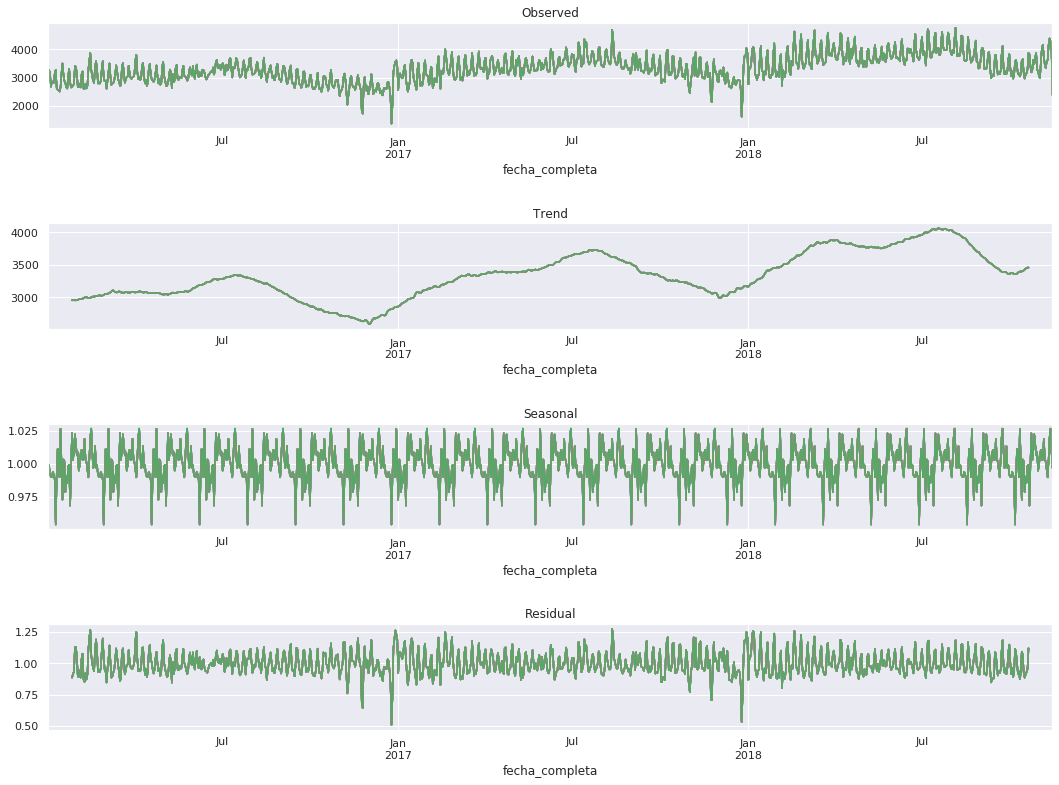

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(18,13))

seasonal = seasonal_decompose(df_groupDate[df_groupDate.index > '2016-1-1'], freq = 50, model='multiplicative')

seasonal.observed.plot(ax = ax1, legend=False)
seasonal.trend.plot(ax = ax2, legend=False)
seasonal.seasonal.plot(ax = ax3, legend=False)
seasonal.resid.plot(ax = ax4, legend=False)


ax1.title.set_text('Observed')
ax2.title.set_text('Trend')
ax3.title.set_text('Seasonal')
ax4.title.set_text('Residual')

plt.subplots_adjust(hspace= 0.9)

Con los datos entre 2016 y 2018 se puede observar el patrón de forma bastante más clara. La verdad es que en este punto de la aplicación, el patrón es clarísimo. Se puede ver que en esta época ya hay usuarios habituales que siguen el mismo comportamiento.

#### 2004 - 2006

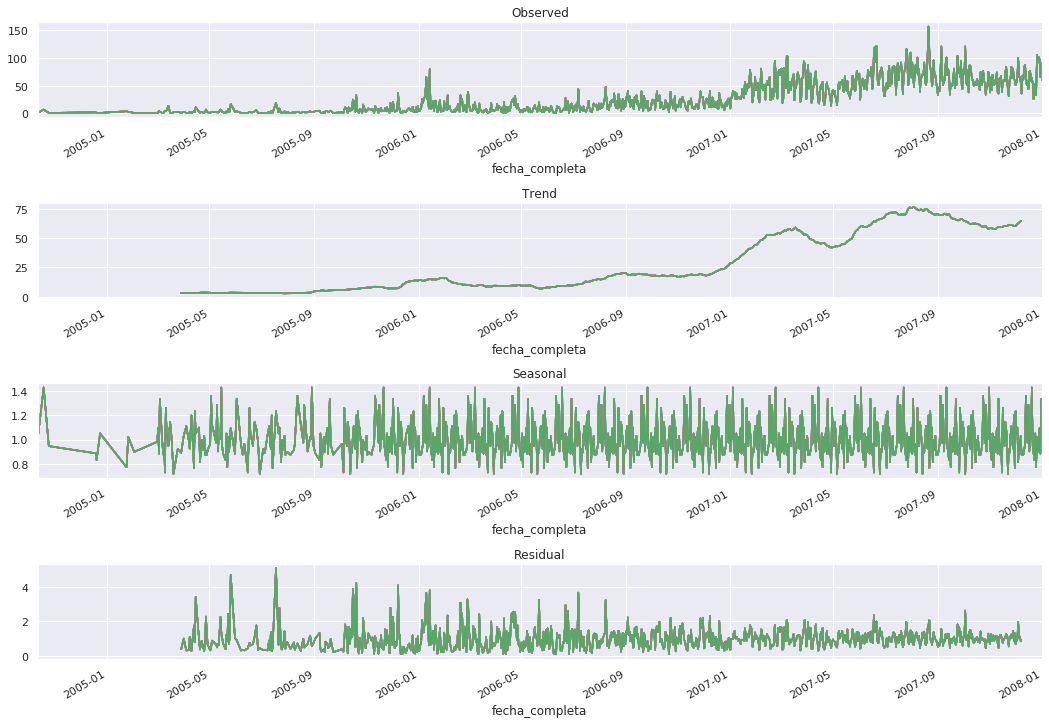

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(18,13))

seasonal = seasonal_decompose(df_groupDate[df_groupDate.index <= '2008-1-1'], freq = 50, model='multiplicative')

seasonal.observed.plot(ax = ax1, legend=False)
seasonal.trend.plot(ax = ax2, legend=False)
seasonal.seasonal.plot(ax = ax3, legend=False)
seasonal.resid.plot(ax = ax4, legend=False)

ax1.title.set_text('Observed')
ax2.title.set_text('Trend')
ax3.title.set_text('Seasonal')
ax4.title.set_text('Residual')

plt.subplots_adjust(hspace= 0.9)

Lo curioso de los datos iniciales es ver como se va formando el patrón poco a poco. Se comienza con una tendencia errática (que suponemos que tendrá algún tipo de sentido) y poco a poco se va formando una serie temporal muy clara.

El número de opiniones a lo largo del año puede llegar a ser realmente útil para saber en qué época del año abrir un negocio. Si sabemos que normalmente en verano (por decir una estación) hay un mayor número de opiniones, podemos entender que es porque hay más gente saliendo de casa y yendo a distintos negocios. Esto quiere decir que **si abrimos un negocio en esa época, podremos obtener más publicidad, más clientes y más éxito**.

Para averiguar cuál es la época del año en concreto en la que deberíamos abrir un negocio, vamos a analizar solo el último año.

### ¿Cuál es la mejor época del año para abrir un negocio según número de opiniones?

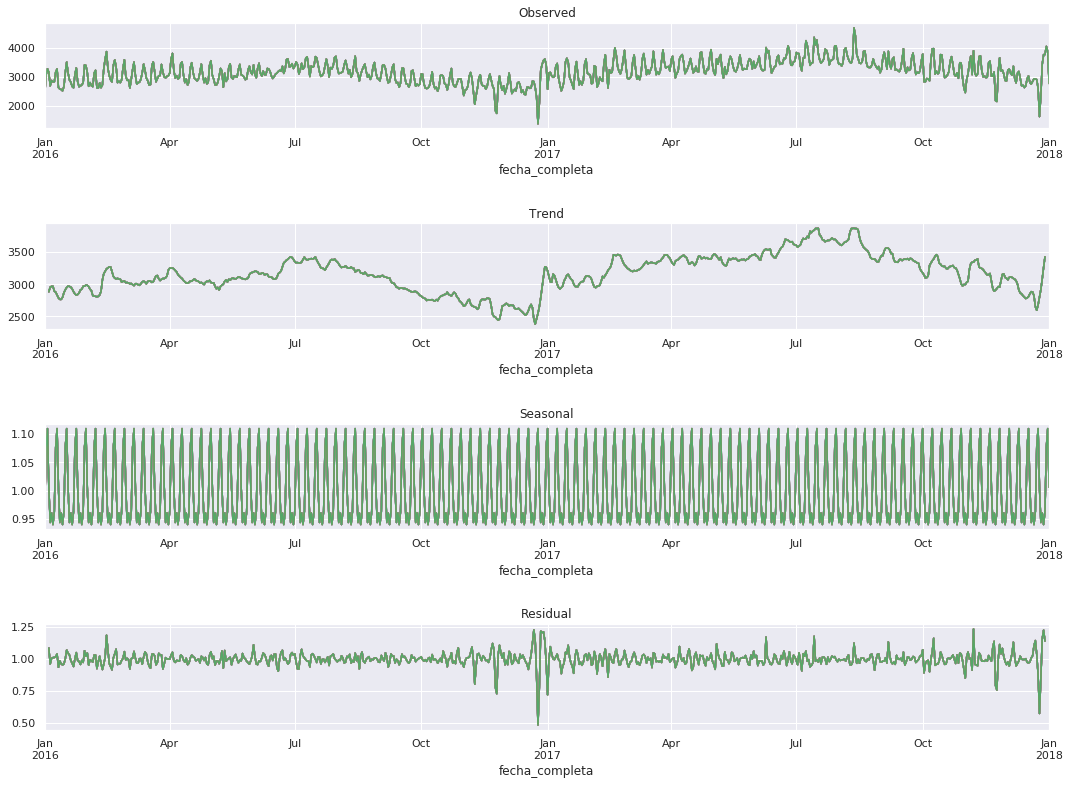

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(18,13))

seasonal = seasonal_decompose(df_groupDate[(df_groupDate.index >= '2016-1-1') & (df_groupDate.index <= '2018-1-1')], freq = 7, model='multiplicative')

seasonal.observed.plot(ax = ax1, legend=False)
seasonal.trend.plot(ax = ax2, legend=False)
seasonal.seasonal.plot(ax = ax3, legend=False)
seasonal.resid.plot(ax = ax4, legend=False)


ax1.title.set_text('Observed')
ax2.title.set_text('Trend')
ax3.title.set_text('Seasonal')
ax4.title.set_text('Residual')

plt.subplots_adjust(hspace= 0.9)

Como se puede observar en el gráfico de tendencia, **la mejor época del año para abrir un negocio según el número de reviews total es en verano**, sobre todo entre los meses de junio y agosto. También hay un pequeño máximo entre marzo y mayo que cuadra con la primavera.

Aunque creemos que la mejor época del año está bastante clara, no conseguimos entender a qué se deben los distintos picos que aparecen en las gráficas. Para ello, vamos a plotear la cantidad de reviews a lo largo de uno de los meses.

### Un mes de mitad de año

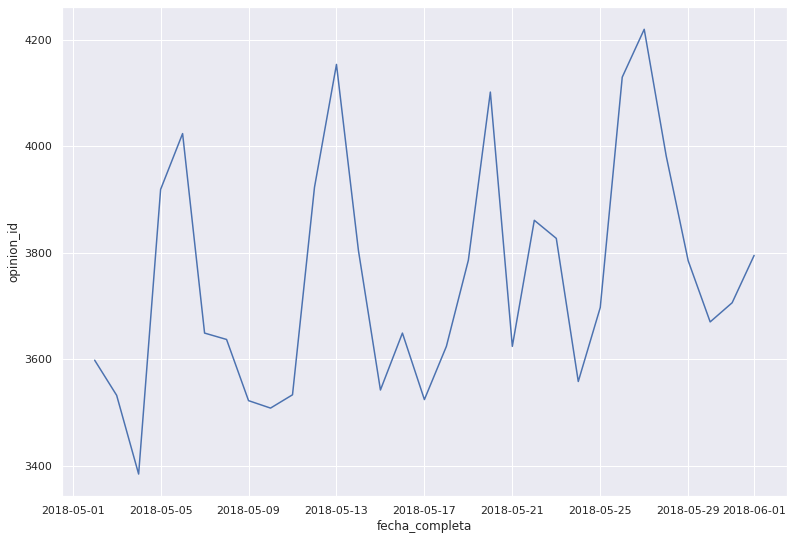

In [49]:
oneMonth = df_groupDate[(df_groupDate.index > '2018-5-1') & (df_groupDate.index <= '2018-6-1') ]

plt.figure(figsize=(13, 9))
ax = sns.lineplot(x = oneMonth.index, y = 'opinion_id', data=oneMonth)

Como se puede ver, en este mes aparecen cuatro picos que se reparten de manera equidistante a lo largo del mes. Claramente, esto se debe a los distintos fines de semana. En estos momentos la gente sale más y, como consecuencia, hace bastantes más reviews.

Se puede observar como a inicios de mes se hacen menos reviews puesto que la gente sale bastante menos. Sin embargo, a finales de mes casi todo el mundo suele salir más y está el pico más alto del conteo de reviews.

### Finales de año

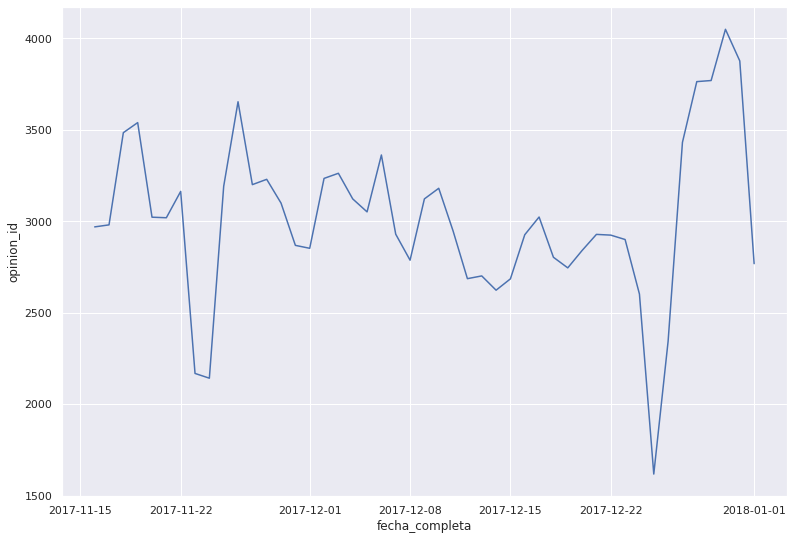

In [41]:
oneMonth = df_groupDate[(df_groupDate.index > '2017-11-15') & (df_groupDate.index <= '2018-1-1') ]

plt.figure(figsize=(13, 9))
ax = sns.lineplot(x = oneMonth.index, y = 'opinion_id', data=oneMonth)

Como ya pudimos ver en la gráfica en la que ploteamos los dos años, existen dos picos a finales de año. Para observar mejor estos picos, hemos hecho un plot con bastante más zoom. Como se puede observar, la zona en la que caen los picos son aproximadamente el 23 de noviembre y el 24 de diciembre. Estas dos fechas hacen referencia al Día de Acción de Gracias y Noche Buena. Estos días la gente no sale apenas y por lo tanto no hay apenas reviews. Finalmente, los dias siguientes hay un pico muy alto de gente que sale y hace reviews.

### ¿Cuál es la mejor época del año para abrir un negocio según la media de puntuación?

Para comprobar al 100% cuál es la mejor época del año para abrir un negocio, vamos a comprobar también cuáles son las puntuaciones medias que se reciben a lo largo del año. Tal vez siguen algún tipo de tendencia que pueda ser útil.

In [19]:
df_groupDateMean = df_opiniones.groupby('fecha_completa').mean()
df_groupDateMean

,puntuacion,util,divertido,guay,anyo,mes,dia,hora,sentimiento,objetividad
fecha_completa,,,,,,,,,,
2004-10-12,5.000000,1.000000,0.000000,1.000000,2004.0,10.0,12.0,10.000000,0.697222,0.644444
2004-10-19,4.428571,1.000000,0.571429,0.714286,2004.0,10.0,19.0,13.714286,0.711895,0.522101
2004-10-25,5.000000,1.000000,0.000000,0.000000,2004.0,10.0,25.0,4.000000,0.777500,0.200000
2004-12-19,3.500000,0.500000,0.500000,0.500000,2004.0,12.0,19.0,20.000000,0.613521,0.498897
2004-12-20,5.000000,1.000000,0.000000,1.000000,2004.0,12.0,20.0,3.000000,0.729167,0.733333
...,...,...,...,...,...,...,...,...,...,...
2018-11-10,3.753661,0.317647,0.137815,0.256663,2018.0,11.0,10.0,12.724850,0.621226,0.436825
2018-11-11,3.733090,0.295832,0.127306,0.222273,2018.0,11.0,11.0,12.265771,0.624748,0.431534
2018-11-12,3.747897,0.334579,0.166121,0.273832,2018.0,11.0,12.0,12.626636,0.621396,0.446023


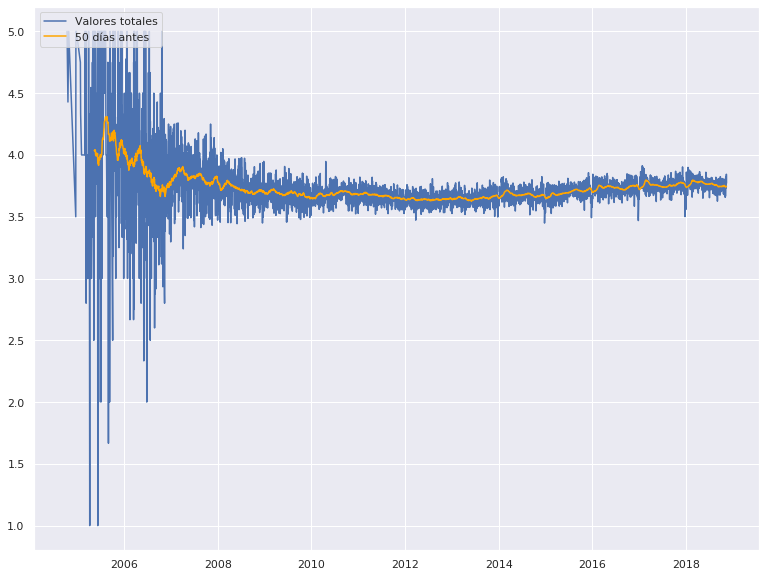

In [20]:
# Generamos la media móvil
rolling_mean = df_groupDateMean.puntuacion.rolling(window=50).mean()

plt.figure(figsize=(13, 10))
plt.plot(df_groupDateMean.index, df_groupDateMean.puntuacion, label='Valores totales')

plt.plot(df_groupDateMean.index, rolling_mean, label='50 días antes', color='orange')
plt.legend(loc='upper left')

plt.show()

Lo primero que llama la atención de esta gráfica es la gran varianza que hay en las fechas más tempranas del data set. No sabemos exactamente a qué se debe, pero podría ser debido a la inestabilidad en cuanto al número de usuarios activos en la aplicación en sus inicios.

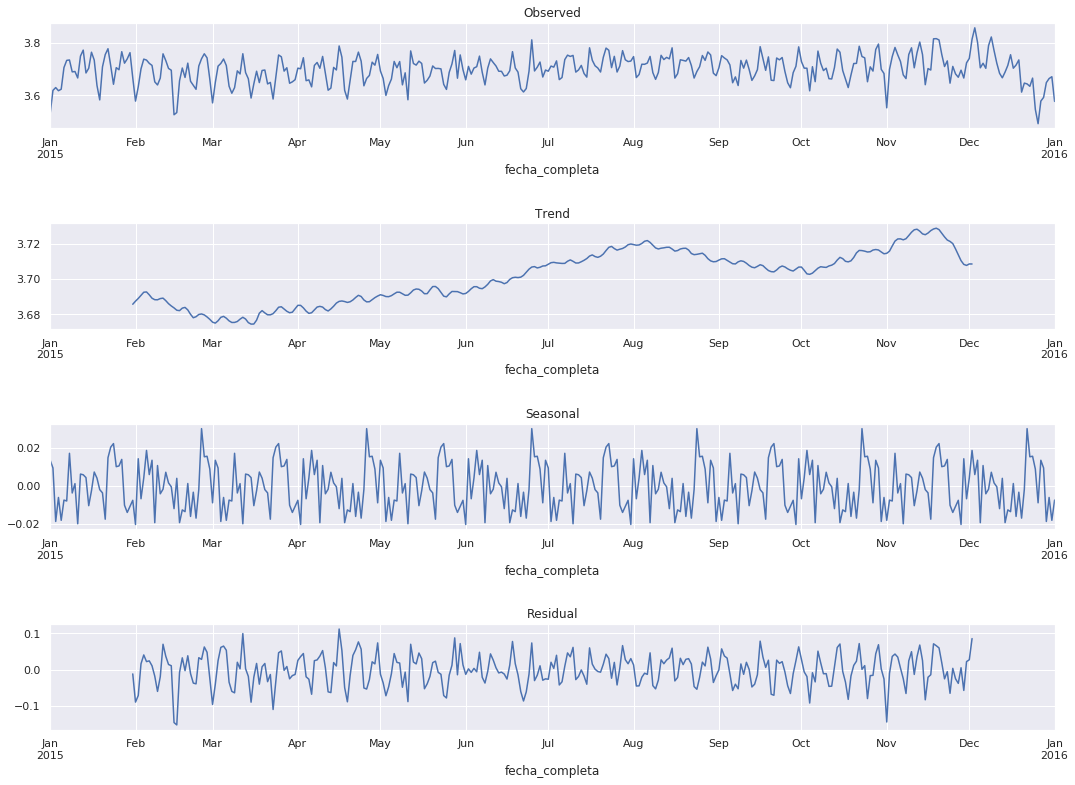

In [68]:
from statsmodels.tsa.seasonal import seasonal_decompose

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(18,13))

seasonal = seasonal_decompose(df_groupDateMean[(df_groupDateMean.index >= '2015-1-1') & (df_groupDate.index <= '2016-1-1') ]['puntuacion'], freq = 60, model='aditive')

seasonal.observed.plot(ax = ax1, legend=False)
seasonal.trend.plot(ax = ax2, legend=False)
seasonal.seasonal.plot(ax = ax3, legend=False)
seasonal.resid.plot(ax = ax4, legend=False)


ax1.title.set_text('Observed')
ax2.title.set_text('Trend')
ax3.title.set_text('Seasonal')
ax4.title.set_text('Residual')

plt.subplots_adjust(hspace = 0.9)

Después de haber observado algunos años, la verdad es que la tendencia no nos ofrece ninguna conclusión clara. Algunos años la media baja bastante en julio, otras veces entre julio y agosto y otras ocasiones entre marzo y mayo. Puede que la conclusión más generalizable sea la de mayo, normalmente sobre mayo, abril y marzo la media de puntuación es menor.

Estas pequeñas ideas apuntan en la dirección de que agosto y, en general, verano son las mejores épocas para abrir un negocio.